In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import time as time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC


warnings.filterwarnings('ignore')

In [9]:
# 1
data = pd.read_csv('wine.csv', sep=',')
data.isna().sum()
data['Customer_Segment'].unique()
data['Customer_Segment'] = data['Customer_Segment'].replace([1,2,3],['premium','medium','low'])

array(['premium', 'medium', 'low'], dtype=object)

<AxesSubplot: >

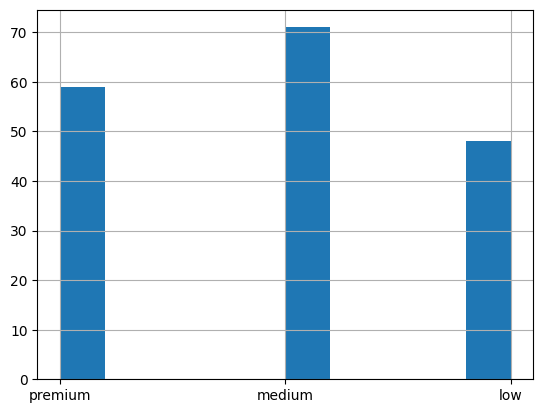

In [17]:
#2 
data['Customer_Segment'].hist()

In [25]:
# 3
predictors = data.drop(['Customer_Segment'], axis=1)
target = data['Customer_Segment']
target_names = ['premium','medium','low']

# print(predictors)
# print(target)
# print(target_names)

x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, random_state=271)
print('размер обучающей выборки: ', x_train.shape)
print('размер тестовой выборки: ', x_test.shape)
print('размер целевого показателя обучпющей выборки: ', y_train.shape)
print('размер для показателя тестовой выборки: ', y_test.shape)



размер обучающей выборки:  (142, 13)
размер тестовой выборки:  (36, 13)
размер целевого показателя обучпющей выборки:  (142,)
размер для показателя тестовой выборки:  (36,)
Предсказанные значения:  ['low' 'medium' 'premium' 'premium' 'medium' 'low' 'medium' 'medium'
 'medium' 'medium' 'medium' 'premium' 'medium' 'premium' 'medium' 'low'
 'medium' 'medium' 'medium' 'low' 'low' 'low' 'medium' 'low' 'low'
 'premium' 'premium' 'medium' 'low' 'low' 'low' 'medium' 'medium' 'medium'
 'premium' 'medium']
Правильные значения:  ['low' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium' 'medium'
 'medium' 'medium' 'medium' 'premium' 'medium' 'premium' 'medium' 'low'
 'medium' 'medium' 'medium' 'low' 'low' 'low' 'medium' 'low' 'low'
 'premium' 'premium' 'medium' 'low' 'low' 'low' 'medium' 'medium' 'medium'
 'premium' 'medium']


In [54]:
# 4
def logistic_regression(x_train, y_train, x_test, y_test):
    start = time.time()
    model = LogisticRegression(random_state=271)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    work_time = time.time() - start
    print('Матрица ошибок для логистической регрессии: ')
    fig = px.imshow(confusion_matrix(y_test, y_predict), labels=dict(x="Predicted", y="Actual"), text_auto=True)
    fig.show()
    return y_predict, work_time

def SVM(x_train, y_train, x_test, y_test):
    start = time.time()
    param_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
    parameters = {'kernel': param_kernel}
    model = SVC()
    grid_search_svm = GridSearchCV(model, parameters, cv=6)
    grid_search_svm.fit(x_train, y_train)
    best_model = grid_search_svm.best_estimator_
    svm_preds = best_model.predict(x_test)
    work_time = time.time() - start
    print('Матрица ошибок для SVM: ')
    fig = px.imshow(confusion_matrix(y_test, svm_preds), labels=dict(x="Predicted", y="Actual"), text_auto=True)
    fig.show()
    return svm_preds, work_time

def KNN(x_train, y_train, x_test, y_test):
    start = time.time()
    number_of_neighbors = np.arange(3,10,25)
    model_knn = KNeighborsClassifier()
    parameters = {'n_neighbors': number_of_neighbors}
    grid_search_knn = GridSearchCV(model_knn, parameters, cv=6)
    grid_search_knn.fit(x_train, y_train)
    knn_preds = grid_search_knn.predict(x_test)
    work_time = time.time() - start
    print('Матрица ошибок для KNN: ')
    fig = px.imshow(confusion_matrix(y_test, knn_preds), labels=dict(x="Predicted", y="Actual"), text_auto=True)
    fig.show()
    return knn_preds , work_time



y_predict_logistic_regression,work_time_LR = logistic_regression(x_train, y_train, x_test, y_test)
y_predict_SVM,work_time_SVM = SVM(x_train, y_train, x_test, y_test)
y_predict_KNN,work_time_KNN = KNN(x_train, y_train, x_test, y_test)


Матрица ошибок для логистической регрессии: 


Матрица ошибок для SVM: 


Матрица ошибок для KNN: 


In [56]:
# 5 

print('Отчет по классификации для логистической регрессии: ')
print('Время работы: ', work_time_LR)
print(classification_report(y_test, y_predict_logistic_regression, target_names=target_names), '\n')


Отчет по классификации для логистической регрессии: 
Время работы:  0.015001058578491211
              precision    recall  f1-score   support

     premium       0.91      1.00      0.95        10
      medium       1.00      0.86      0.92        21
         low       0.71      1.00      0.83         5

    accuracy                           0.92        36
   macro avg       0.87      0.95      0.90        36
weighted avg       0.94      0.92      0.92        36
 



In [57]:
print('Отчет по классификации для SVM: ')
print('Время работы: ', work_time_SVM)
print(classification_report(y_test, y_predict_SVM, target_names=target_names),'\n')


Отчет по классификации для SVM: 
Время работы:  0.4008753299713135
              precision    recall  f1-score   support

     premium       0.91      1.00      0.95        10
      medium       1.00      0.86      0.92        21
         low       0.71      1.00      0.83         5

    accuracy                           0.92        36
   macro avg       0.87      0.95      0.90        36
weighted avg       0.94      0.92      0.92        36
 



In [58]:
print('Отчет по классификации для KNN: ')
print('Время работы: ', work_time_KNN)
print(classification_report(y_test, y_predict_KNN, target_names=target_names),'\n')

Отчет по классификации для KNN: 
Время работы:  0.030007362365722656
              precision    recall  f1-score   support

     premium       0.62      0.50      0.56        10
      medium       0.76      0.76      0.76        21
         low       0.57      0.80      0.67         5

    accuracy                           0.69        36
   macro avg       0.65      0.69      0.66        36
weighted avg       0.70      0.69      0.69        36
 

